<a href="https://colab.research.google.com/github/DmitryMarchenko/mipt-dataviz/blob/main/dataviz_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import networkx as nx

In [430]:
G = nx.read_graphml('tree-84n.xml')
root = [node for node, in_degree in G.in_degree() if in_degree == 0][0]

In [431]:
def set_y(node, h):
  assert len(list(G.successors(node))) <= 2
  G.nodes[node]['y'] = h
  for s in G.successors(node):
    set_y(s, h-1)

In [432]:
def shift_subtree(node, shift):
  G.nodes[node]['x'] += shift
  for s in G.successors(node):
    shift_subtree(s, shift)

In [433]:
def get_contour(node):
  successors = list(G.successors(node))
  contour = []
  if len(successors) == 2:
    left_contour = get_contour(successors[0])
    right_contour = get_contour(successors[1])
    contour += [(min(lc[0], rc[0]), max(lc[1], rc[1])) for lc, rc in zip(left_contour, right_contour)]
    long_contour = left_contour if len(left_contour) > len(right_contour) else right_contour
    contour += long_contour[min(len(left_contour), len(right_contour)):]
  if len(successors) == 1:
    contour += get_contour(successors[0])
  return [(G.nodes[node]['x'], G.nodes[node]['x'])] + contour

In [434]:
def set_x(node):
  successors = list(G.successors(node))
  assert len(successors) <= 2
  if len(successors) == 2:
    contour_1 = set_x(successors[0])
    contour_2 = set_x(successors[1])
    shift = max([contour_1[h][1] + 1 - contour_2[h][0] for h in range(min(len(contour_1), len(contour_2)))])
    shift_subtree(successors[1], shift)
    G.nodes[node]['x'] = (G.nodes[successors[0]]['x'] + G.nodes[successors[1]]['x']) / 2
  elif len(successors) == 1:
    set_x(successors[0])
    G.nodes[node]['x'] = G.nodes[successors[0]]['x']
  else:
    G.nodes[node]['x'] = 0
  return get_contour(node)

In [435]:
def set_coords(node):
  set_y(node, 0)
  set_x(node)

In [436]:
set_coords(root)

In [437]:
def draw(graph):
  pos = {}
  for node in graph.nodes:
    pos[node] = (graph.nodes[node]['x'], graph.nodes[node]['y'])
  nx.draw(graph, pos=pos, node_size=300*21/len(graph.nodes))

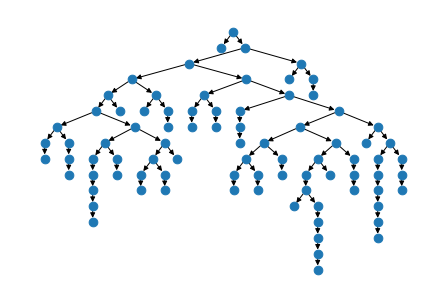

In [438]:
draw(G)